In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm' , disable = ['ner' , 'tagger' , 'parser'])

In [8]:
path = 'train.csv'
df = pd.read_csv(path)
df = df.sample(frac = 1)
df = df.reset_index(drop=True)
df.head() 

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,6dd872eccac27249,What is your problem Man? \n\nWhy do you have ...,1,0,0,0,0,0
1,ade9995deed09f81,Warning \n\nUnder a decision of the Arbitratio...,0,0,0,0,0,0
2,5dfe275dc5eea33a,"Thanks for your response, much better than thi...",0,0,0,0,0,0
3,73f4d9f52106b271,"""\n\n Tibet \n\nPlease do not add commercial l...",0,0,0,0,0,0
4,2939e59c144a4432,Calling me a joke is not a personal attack? Hy...,1,0,0,0,0,0


### Preprocessing the data

In [9]:
df.drop('id' , axis = 1 , inplace = True)
df.dropna(inplace= True)
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,What is your problem Man? \n\nWhy do you have ...,1,0,0,0,0,0
1,Warning \n\nUnder a decision of the Arbitratio...,0,0,0,0,0,0
2,"Thanks for your response, much better than thi...",0,0,0,0,0,0
3,"""\n\n Tibet \n\nPlease do not add commercial l...",0,0,0,0,0,0
4,Calling me a joke is not a personal attack? Hy...,1,0,0,0,0,0


In [6]:
drop_list = []
for idx in range(len(df)):
    text = df.iloc[idx , 0]
    if type(text) != str or text == "" or df.iloc[idx , 0].isspace() :
        drop_list.append(idx)
drop_list

[]

In [7]:
# df.iloc[: , 1:].value_counts()

### Reducing the number of comments with no classes

In [8]:
comment_len = [len(x) for x in df['comment_text']]
comment_len = np.array(comment_len)
comment_len.mean() , comment_len.min() , comment_len.max()

(394.0732213246768, 6, 5000)

Text(0, 0.5, 'no of comments')

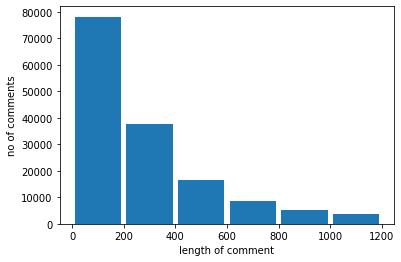

In [9]:
bins = [0 , 200 ,400 ,600, 800 , 1000 , 1200 ]

plt.hist(comment_len , bins = bins ,rwidth = 0.90)
plt.xlabel('length of comment')
plt.ylabel('no of comments')

In [10]:
comments = df.iloc[: , 0]
labels = df.iloc[: , 1:]
labels.shape

(159571, 6)

In [11]:
# y = np.zeros(labels.shape[1
y = [[],[],[],[],[],[]]
for i in range(len(comments)):
    length = len(comments[i])
    for j in range(6):
        if labels.iloc[i , j] == 1:
            y[j].append(length)


Text(0, 0.5, 'no of comments')

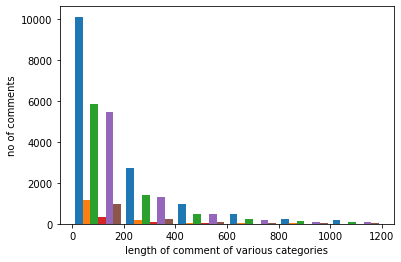

In [12]:
bins = [0 , 200 ,400 ,600, 800 , 1000 , 1200 ]
plt.hist(y ,bins = bins , rwidth = 0.90)
plt.xlabel('length of comment of various categories')
plt.ylabel('no of comments')

In [13]:
drop_list = []
for i in range(len(comments)):
    if comment_len[i] > 350:
        drop_list.append(i)
comments.drop(drop_list , axis = 0 , inplace = True)
# comment_len.drop(drop_list , axis =0 , inplace = True)
labels.drop(drop_list , axis = 0 , inplace = True)

In [14]:
comments.shape , labels.shape

((109344,), (109344, 6))

In [15]:
print(f"{((159571 - 100982)/159571)*100} %")

36.716571306816405 %


### Doing the standard preprocessing for textual data :

### lower casing

In [16]:
comments = comments.str.lower()

### remove punctuations

In [17]:
punctuations = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\n'
def remove_punc(text):
    no_punc = ''
#     no_punc = [ch for ch in text if ch not in punctuations]
    for ch in text:
        if ch not in punctuations:
            no_punc += ch
    return no_punc
comments1 = comments.apply(lambda text : remove_punc(text))
print(comments1.iloc[1]) 
print(comments.iloc[1]) 

 mediation  this is a request to see if you will submit to formal mediation regarding your actions on  this issue  thanks talk 
"

 mediation  
this is a request to see if you will submit to formal mediation regarding your actions on  this issue.  thanks. (talk) "


### remove stop words

In [18]:
comments = comments1
def remove_stop(text):
    ans = []
    words = text.split()
    for word in words:
        if nlp.vocab[word].is_stop == False:
            ans.append(word)
    return ' '.join(ans)
comments = comments.apply(lambda text : remove_stop(text))

### lemmatization

In [19]:
def lemma(text):
    ans = []
    doc = nlp(text)
    for token in doc:
        ans.append(token.lemma_)
    return ' '.join(ans)

In [20]:
comments = comments.apply(lambda text : lemma(text))
comments.iloc[1]

'mediation request submit formal mediation action issue thank talk'

In [21]:
comments.shape , labels.shape

((109344,), (109344, 6))

In [26]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comments)
comments_tok = tokenizer.texts_to_sequences(comments)
comments_tok = np.array(comments_tok)

In [27]:
# len(comments_tok)
comments_tok.shape

(109344,)

In [28]:
vocab_size = len(tokenizer.word_counts) + 1

In [31]:
from keras.preprocessing.sequence import pad_sequences
max_len = 350
comments_pad = pad_sequences(comments_tok , maxlen=max_len, padding='post')
comments_pad.shape


(109344, 350)

In [32]:
lab = labels.iloc[: , :].values
lab

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain , ytest = train_test_split(comments_pad , lab , test_size = 0.25)
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape 

((82008, 350), (27336, 350), (82008, 6), (27336, 6))

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , Embedding , Flatten

In [45]:
model = Sequential()
# every word will convert to vector of dimension 50 , Note : try higher values after
model.add(Embedding(input_dim = vocab_size , output_dim = 50 , input_length= 350))
model.add(Flatten())
model.add(Dense(max_len * 2 , activation = 'relu')) 
model.add(Dropout(0.15))
model.add(Dense(6 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 350, 50)           5681400   
_________________________________________________________________
flatten_3 (Flatten)          (None, 17500)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 700)               12250700  
_________________________________________________________________
dropout_3 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 4206      
Total params: 17,936,306
Trainable params: 17,936,306
Non-trainable params: 0
_________________________________________________________________


In [37]:
xtrain.shape , ytrain.shape , xtrain[1 , :].shape

((82008, 350), (82008, 6), (350,))

In [46]:
model.fit(xtrain , ytrain , batch_size = 128 , epochs = 2)

Epoch 1/2
641/641 [==============================] - 45s 70ms/step - loss: 0.0871 - accuracy: 0.9257
Epoch 2/2
641/641 [==============================] - 44s 69ms/step - loss: 0.0502 - accuracy: 0.9783


In [47]:
ypre = model.predict(xtest)
ypred = []
for x in ypre[: ,0]:
    if x >= 0.5 :
        ypred.append(1)
    else:
        ypred.append(0)
from sklearn.metrics import classification_report
print(classification_report(ytest[ : ,0] , ypred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     24223
           1       0.87      0.69      0.77      3113

    accuracy                           0.95     27336
   macro avg       0.91      0.84      0.87     27336
weighted avg       0.95      0.95      0.95     27336



In [110]:
def pred_toxic(comm):
    
    comm = comm.apply(lambda text : remove_stop(text))
    comm = comm.apply(lambda text : lemma(text))
    
    # print(len(text))
    comm_tok = tokenizer.texts_to_sequences(comm)
    comm_tok = np.array(comm_tok)
    
    comm_pad = pad_sequences(comm_tok , maxlen = max_len , padding = 'post')
    comm_pad = np.array(comm_pad)

    ypred = model.predict(comm_pad)

    for i in range(ypred.shape[0]):
        for j in range(6):
            if ypred[i][j] >= 0.5:
                ypred[i][j] = 1
            else:
                ypred[i][j] = 0 

    print(ypred)
   

In [111]:
sent1 = "you fool mind your own business"
sent2 = "you dont know anything !"
sent3 = "Hello , football match tommorow at my place"
sent4 = "stay away from me you idiot"
data = [[sent1] ,[sent2] , [sent3] , [sent4]]
df = pd.DataFrame(data)
comm = df.iloc[: , 0]

# df
pred_toxic(comm)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0.]]
